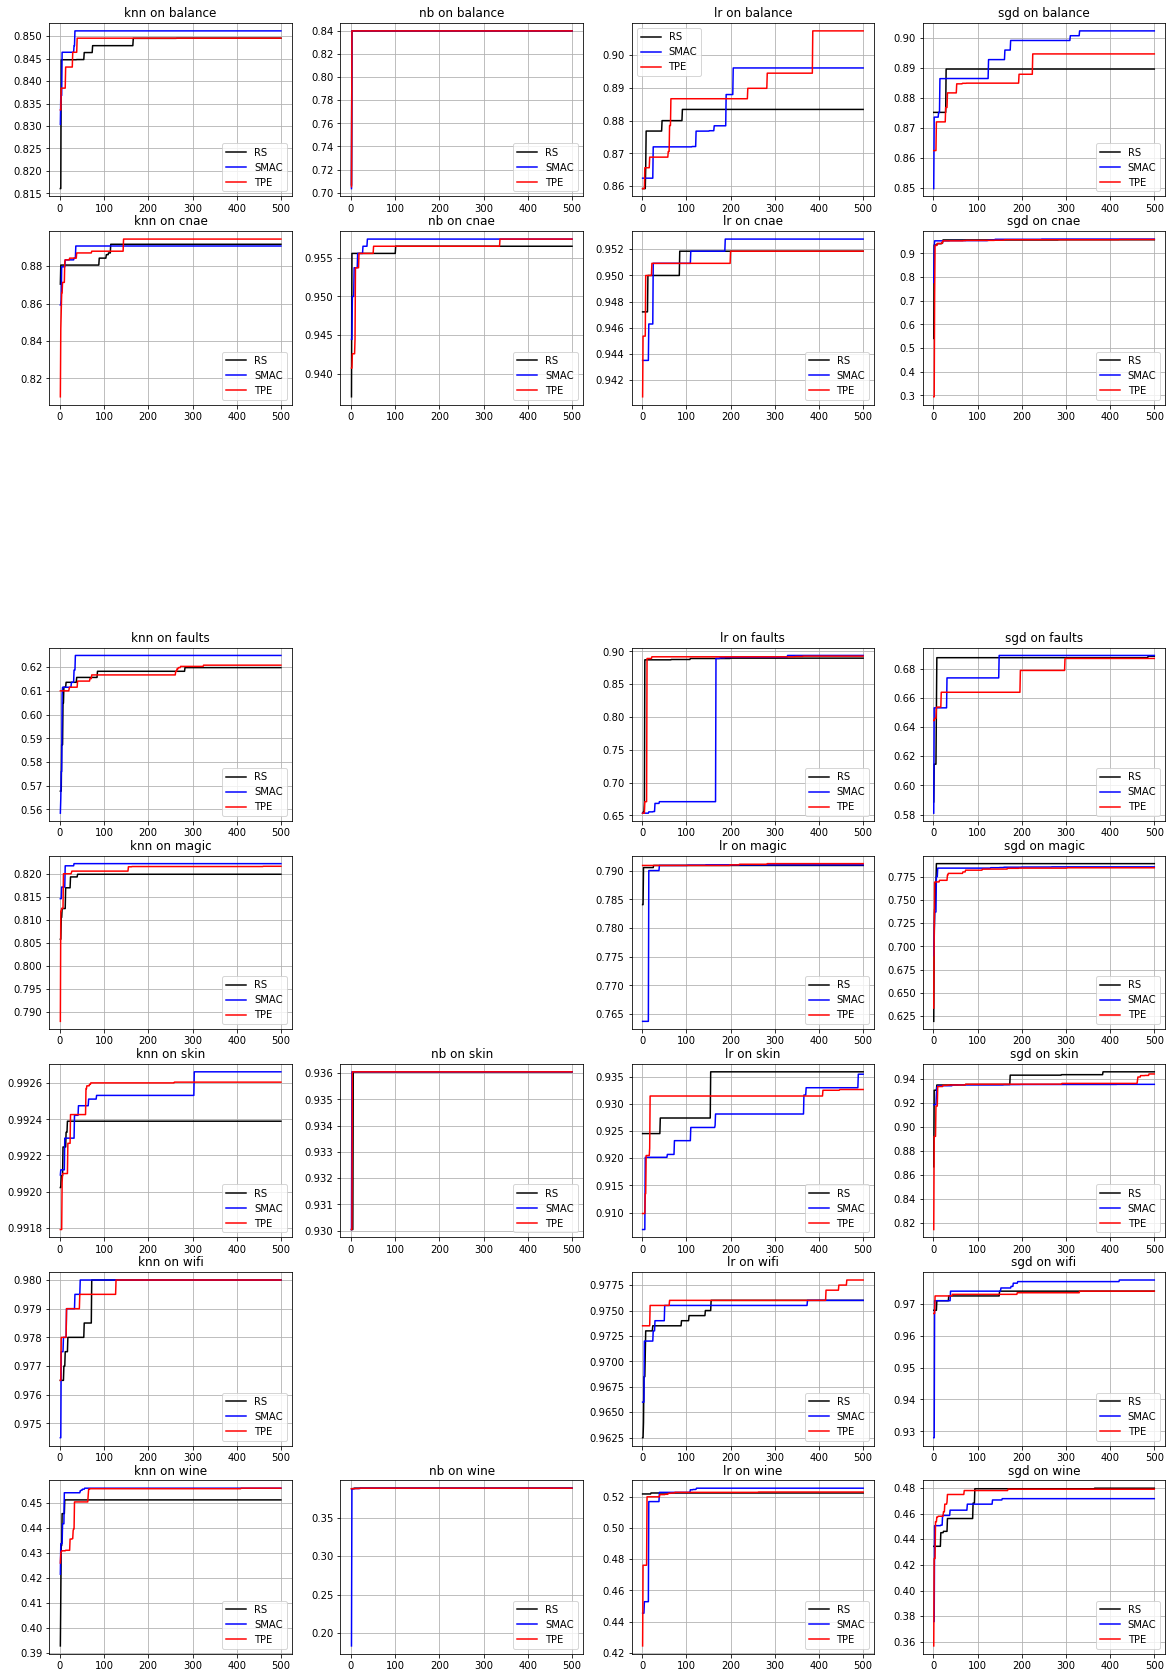

In [10]:
import os
import matplotlib.pyplot as plt


def read_file(path):
    with open(path, 'r',encoding='utf-8') as f:
        content = [float(x.strip()) for x in f.readlines()]
    start_index = 0
    for i in range(len(content)):
        if content[i] < 0.1:
            start_index += 1
        if content[i] >= 0.3 and start_index > 0:
            break
    content = content[start_index:]
    if len(content) < 500:
        while len(content) != 500:
            content.append(content[-1])
    return content[:500]


rs_path = 'random-search/extractedDataForPlots/'
tpe_path = 'tpe/resultsForPlots/'
smac_path = 'smac/resultsForPlots/'

all_paths = [rs_path, smac_path, tpe_path]

path_to_model = {'random-search/extractedDataForPlots/': 'RS',
                 'tpe/resultsForPlots/': 'TPE',
                 'smac/resultsForPlots/': 'SMAC'}

alg_to_color = {'RS': 'black',
                'SMAC': 'blue',
                'TPE': 'red'}

models = ['knn','nb','lr','sgd']
algs = ['RS','SMAC','TPE']
performance_dict = {alg:{model:{} for model in models} for alg in algs}

for path in all_paths:
    for model in models:
        curr_path = path + model + '/'
        logfiles = os.listdir(curr_path)
                
        for logfile in logfiles:
            dataset = logfile.split('.')[0]
            if 'acc' in dataset:
                dataset = dataset[4:]
            total_path = curr_path + logfile
            performance_dict[path_to_model[path]][model][dataset] = read_file(total_path)
            
datasets = set()
for alg in algs:
    for model in models:
        ds = list(performance_dict[alg][model].keys())
        datasets = datasets.union(set(ds))
        
plt.figure(figsize=(20,30))

x_axis = [x+1 for x in range(500)]

counter = 1
#Dataset rows by model columns
for idd, dataset in enumerate(sorted(list(datasets))):
    dataset_index = idd + 1
    for idm, model in enumerate(models):
        model_index = idm + 1
        if not dataset in performance_dict['RS'][model]:
            counter += 1
            continue
        plt.subplot(len(datasets), len(models), counter)
        for alg in algs:
            plt.plot(x_axis, performance_dict[alg][model][dataset], color=alg_to_color[alg],label=alg)
        plt.title(f'{model} on {dataset}')
        plt.grid(True)
        plt.legend()
        counter += 1
plt.savefig('plots.png')  

In [11]:
performance_dict['SMAC']['lr']['faults']

[0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6532724869306444,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6552573019004536,
 0.6557714407179344,
 0.6557714407179344,
 0.6557714407179344,
 0.6557714407179344,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6681718844449758,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624472742,
 0.6707930624